# Workshop 8: Plucking Strings

In [1]:
import scipy         # Another numerical library
from scipy import integrate

import matplotlib    # Library used for plotting
import numpy as np   # Numerical library
import matplotlib.pyplot as plt # Plot commands
import time

# Define some colors using the RGB format

CF_red = (204/255, 121/255, 167/255)
CF_vermillion = (213/255, 94/255, 0)
CF_orange = (230/255, 159/255, 0)
CF_yellow = (240/255, 228/255, 66/255)
CF_green = (0, 158/255, 115/255)
CF_sky = (86/255, 180/255, 233/255)
CF_blue = (0, 114/255, 178/255)
CF_black = (0, 0, 0)

### Plucking Strings

As you might have already learned (if not, don't worry), the equation of a vibrating string stretched along the $x$ direction is

$$
\frac{\partial^2 y}{\partial x^2} = \frac{\rho}{T}\frac{\partial^2 y}{\partial t^2}\,,
$$

where $T$ is the tension of the string, $\rho$ is the linear density, and $y\left(x,t\right)$ is the transverse displacement of the string segment.

Using the time Fourier transform alows us to recast the string equation into the following form

$$
\frac{d^2 \hat{y}\left(x\right)}{dx^2} = -\omega^2\frac{\rho}{T}\hat{y}\left(x\right)\,,
$$

where $\omega$ is the vibration frequency. You can think of $\hat{y}\left(x\right)$ as the amplitude of the string vibration at some $x$ for a given $\omega$.

Let us now take a string of length $L$ and linear density $\rho$. We stretch it until it has tension $T$ and then fix its endpoints (it's a string, after all). This means that $\hat{y}\left(0\right) = \hat{y}\left(L\right) = 0$. Importantly, there is *NO* reason to expect this to be true for a general case of the string equation! This means that there should be some special values of $\omega$ that allow this to hold.

Consider a string with $\rho = 1.14\times10^{-3}$ kg/m and set the tension to $72$ N. Set $L = 0.64$ m. Let us see what $\omega$'s satisfy the equation.

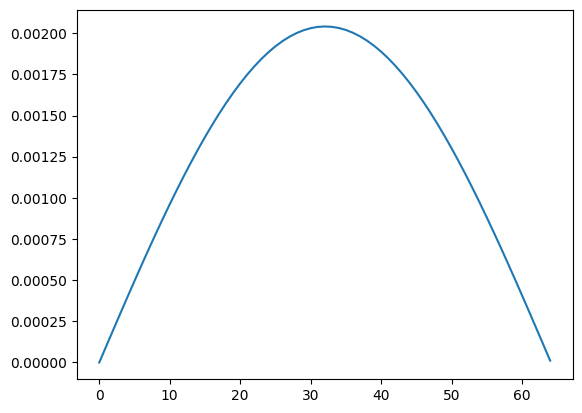

In [2]:
rho = 1.14e-3
tension = 72
L = 0.64
omega = 1 * 196 * 2 * np.pi
# omega = 1 * np.pi / L * np.sqrt(tension / rho)

t_min = 0
t_max = 0.64
epsilon = 0.01
init = np.array([0, 0.01])

def derivative(t, state):
    position, velocity = state
    next_velocity = -(omega ** 2 * rho / tension) * position
    return np.array([velocity, next_velocity])

solution = integrate.solve_ivp(derivative, [t_min, t_max], init, max_step = epsilon)
p, v = solution.y

fig, ax = plt.subplots(1, 1)
ax.plot(p)

Sometimes you don't want to waste your time looking for solutions by hand. Is it possible to speed up the process a bit?

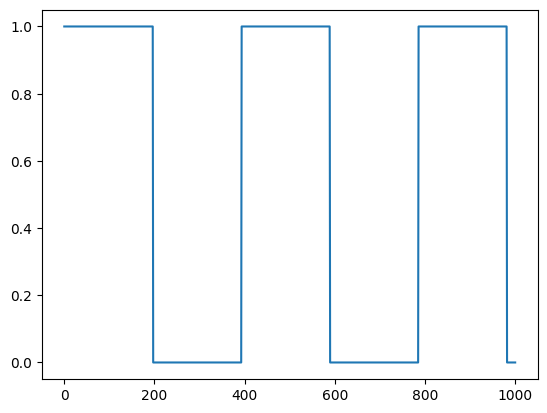

In [3]:
multipliers = np.linspace(0, 1000, 1000)
final_positions = []

for multiplier in multipliers:
    omega = multiplier * 2 * np.pi

    def derivative(t, state):
        position, velocity = state
        next_velocity = -(omega ** 2 * rho / tension) * position
        return np.array([velocity, next_velocity])

    solution = integrate.solve_ivp(derivative, [t_min, t_max], init, max_step = epsilon)
    p, v = solution.y
    final_positions.append((p[-1] > 0))

fig, ax = plt.subplots(1, 1)
ax.plot(multipliers, final_positions)

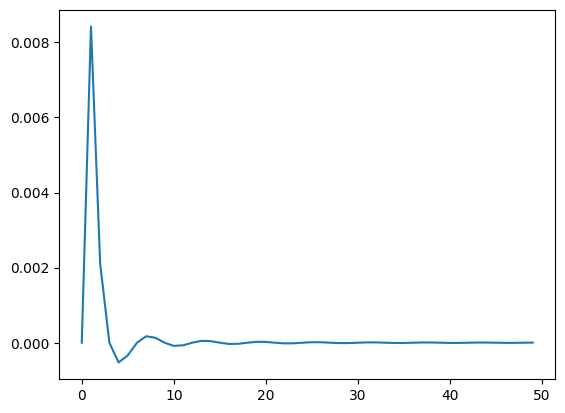

In [59]:
L = 0.64
m = 0.05

def initial_deformation(x):
    if x < (L / 3):
        return m * x
    else: 
        return ((m * L / 2) - (m * x / 2))

def C_n(n):
    func = lambda x: initial_deformation(x) * np.sin(n * np.pi * x / L)
    integral = integrate.quad(func, 0, L)
    return (2 / L * integral[0])
    
ns = list(range(0, 50))
C_ns = np.array([C_n(n) for n in ns])

fig, ax = plt.subplots(1, 1)
ax.plot(ns, C_ns)

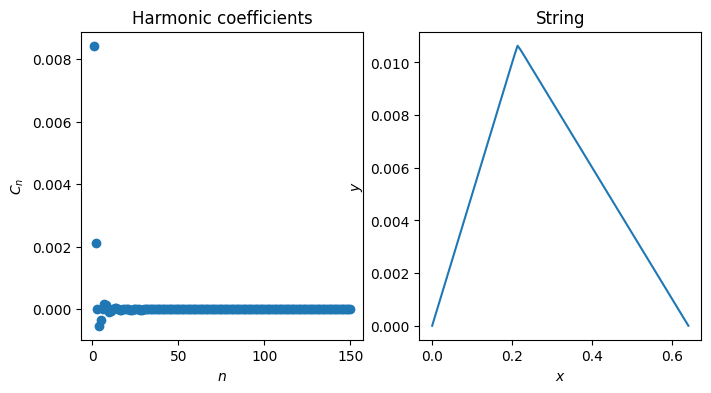

<Figure size 640x480 with 0 Axes>

In [60]:
n_harm = 150
C_ns = [C_n(n) for n in range(1, n_harm + 1)]

def term(x, n):
    return C_n(n) * np.sin(n * np.pi * x / L)

def my_string(x):
    return np.sum([term(x, n) for n in range(1, n_harm + 1)])

xs = np.linspace(0, L, 100)
res = [my_string(x) for x in xs]

fig, axs = plt.subplots(1, 2, figsize = (8, 4))
fig = plt.figure()
axs[0].scatter(range(1, n_harm + 1), C_ns)
axs[0].set(xlabel = "$n$", ylabel = "$C_n$", title = "Harmonic coefficients")
axs[1].plot(xs, res)
axs[1].set(xlabel = "$x$", ylabel = "$y$", title = "String")
plt.tight_layout()

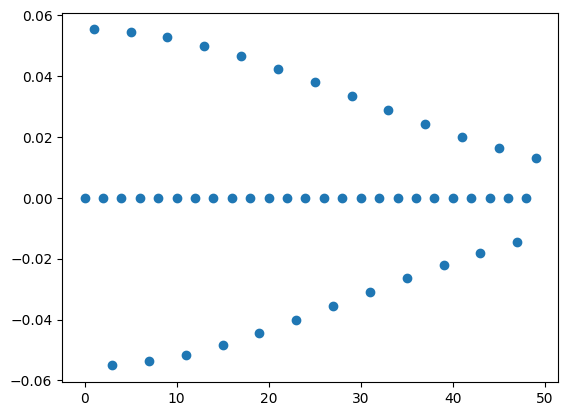

In [69]:
s = 0.01
def initial_deformation(x):
    return np.exp(- (x - (L / 2)) ** 2 / s ** 2) - np.exp(-(L / 2) ** 2 / s ** 2)
    
ns = list(range(0, 50))
C_ns = np.array([C_n(n) for n in ns])

fig, ax = plt.subplots(1, 1)
ax.scatter(ns, C_ns)

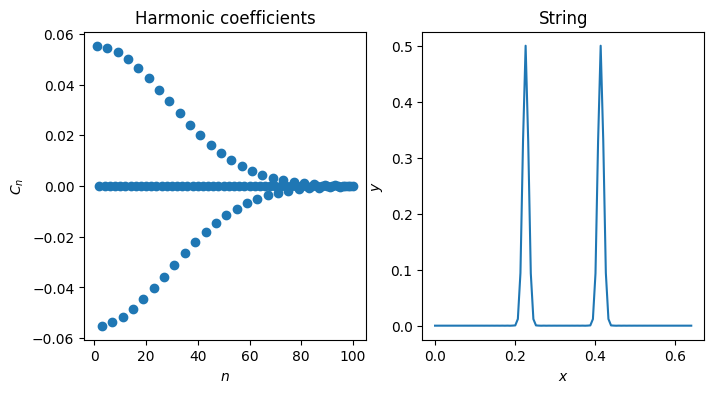

<Figure size 640x480 with 0 Axes>

In [89]:
F = 72
rho = 1.14e-3

L = 0.64
m = 0.05
s = 0.01

n_harm = 100
def initial_deformation(x):
    return np.exp(- (x - (L / 2)) ** 2 / s ** 2) - np.exp(-(L / 2) ** 2 / s ** 2)

def C_n(n):
    func = lambda x: initial_deformation(x) * np.sin(n * np.pi * x / L)
    integral = integrate.quad(func, 0, L)
    return (2 / L * integral[0])

def term(x, t, n):
    return (C_n(n) * np.sin(n * np.pi * x / L) * (np.cos(n * np.pi * t / L * np.sqrt(F / rho))))

def my_string(x, t):
    return np.sum([term(x, t, n) for n in range(1, n_harm + 1)])

nPts = 100
t = 0.02

C_ns = [C_n(n) for n in range(1, n_harm + 1)]
xs = np.linspace(0, L, nPts)
res = [my_string(x, t) for x in xs]

fig, axs = plt.subplots(1, 2, figsize = (8, 4))
fig = plt.figure()
axs[0].scatter(range(1, n_harm + 1), C_ns)
axs[0].set(xlabel = "$n$", ylabel = "$C_n$", title = "Harmonic coefficients")
axs[1].plot(xs, res)
axs[1].set(xlabel = "$x$", ylabel = "$y$", title = "String")
plt.tight_layout()